In [1]:
import holidays
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis
from sklearn.cluster import DBSCAN
from pandas import Series, DataFrame
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.vecm import VECM
%matplotlib inline

In [2]:
gold_data = pd.read_excel (r'C:\Users\RSHARMA\Desktop\GR3\Data.xlsx', sheet_name='Gold_Apr_Dec', index_col='Date',parse_dates=True)


print(gold_data,'\n')

                 Open       High        Low      Close  Adj Close
Date                                                             
2020-04-01  15.730000  15.900000  15.654000  15.840000  15.840000
2020-04-02  15.990000  16.160000  15.960000  16.110001  16.110001
2020-04-03  16.129999  16.219999  16.070000  16.209999  16.209999
2020-04-06  16.330000  16.650000  16.309999  16.610001  16.610001
2020-04-07  16.459999  16.580000  16.370001  16.570000  16.570000
...               ...        ...        ...        ...        ...
2020-12-23  18.590000  18.700001  18.584999  18.650000  18.650000
2020-12-24  18.620001  18.730000  18.620001  18.730000  18.730000
2020-12-28  18.830000  18.885000  18.639999  18.650000  18.650000
2020-12-29  18.719999  18.780001  18.639999  18.719999  18.719999
2020-12-30  18.730000  18.860001  18.730000  18.860001  18.860001

[190 rows x 5 columns] 



In [3]:
equity_data = pd.read_excel (r'C:\Users\RSHARMA\Desktop\GR3\Data.xlsx', sheet_name='Equity_Apr_Dec', index_col='Date',parse_dates=True)


print(equity_data,'\n')

               Symbol  Prev Close  Open Price  High Price  Low Price  \
Date                                                                   
2020-04-01  SETFNIF50       89.40       92.10       94.80      88.25   
2020-04-03  SETFNIF50       89.13       90.95       90.95      84.71   
2020-04-07  SETFNIF50       85.17       88.60       91.50      86.00   
2020-04-08  SETFNIF50       90.78       90.65       93.50      89.10   
2020-04-09  SETFNIF50       90.32       92.00       93.41      91.50   
...               ...         ...         ...         ...        ...   
2020-12-24  SETFNIF50      141.00      141.25      143.00     141.00   
2020-12-28  SETFNIF50      142.90      147.00      151.00     143.00   
2020-12-29  SETFNIF50      143.90      145.14      145.14     143.84   
2020-12-30  SETFNIF50      144.57      145.00      145.38     143.91   
2020-12-31  SETFNIF50      145.00      144.81      145.31     144.46   

            Last Price  Adj Close  Average Price  
Date        

In [4]:
bitcoin_data = pd.read_excel (r'C:\Users\RSHARMA\Desktop\GR3\Data.xlsx', sheet_name='Bitcoin_Apr_Dec', index_col='Date',parse_dates=True)


print(bitcoin_data,'\n')

                    Open          High           Low         Close  \
Date                                                                 
2020-04-01   6437.319336   6612.573730   6202.373535   6606.776367   
2020-04-02   6606.776367   7088.247559   6595.918457   6793.624512   
2020-04-03   6797.396484   7003.220703   6673.335938   6733.387207   
2020-04-04   6738.382813   6878.953613   6696.484863   6867.527344   
2020-04-05   6862.537598   6883.414063   6715.929199   6791.129395   
...                  ...           ...           ...           ...   
2020-12-27  26439.373047  28288.839844  25922.769531  26272.294922   
2020-12-28  26280.822266  27389.111328  26207.640625  27084.808594   
2020-12-29  27081.810547  27370.720703  25987.298828  27362.437500   
2020-12-30  27360.089844  28937.740234  27360.089844  28840.953125   
2020-12-31  28841.574219  29244.876953  28201.992188  29001.720703   

               Adj Close  
Date                      
2020-04-01   6606.776367  
2020-04-

In [5]:
gold_data["Daily Return"] = gold_data["Adj Close"].pct_change(1)
gold_data.head()

,Open,High,Low,Close,Adj Close,Daily Return
Date,,,,,,
2020-04-01,15.730000,15.900000,15.654000,15.840000,15.840000,NaN
2020-04-02,15.990000,16.160000,15.960000,16.110001,16.110001,0.017046
2020-04-03,16.129999,16.219999,16.070000,16.209999,16.209999,0.006207
2020-04-06,16.330000,16.650000,16.309999,16.610001,16.610001,0.024676
2020-04-07,16.459999,16.580000,16.370001,16.570000,16.570000,-0.002408


In [6]:
equity_data["Daily Return"] = equity_data["Adj Close"].pct_change(1)
equity_data.head()

,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Adj Close,Average Price,Daily Return
Date,,,,,,,,,
2020-04-01,SETFNIF50,89.40,92.10,94.80,88.25,89.10,89.13,88.91,NaN
2020-04-03,SETFNIF50,89.13,90.95,90.95,84.71,85.35,85.17,85.65,-0.044429
2020-04-07,SETFNIF50,85.17,88.60,91.50,86.00,90.79,90.78,88.89,0.065868
2020-04-08,SETFNIF50,90.78,90.65,93.50,89.10,90.30,90.32,91.60,-0.005067
2020-04-09,SETFNIF50,90.32,92.00,93.41,91.50,93.19,93.11,92.88,0.030890


In [7]:
bitcoin_data["Daily Return"] = bitcoin_data["Adj Close"].pct_change(1)
bitcoin_data.head()

,Open,High,Low,Close,Adj Close,Daily Return
Date,,,,,,
2020-04-01,6437.319336,6612.573730,6202.373535,6606.776367,6606.776367,NaN
2020-04-02,6606.776367,7088.247559,6595.918457,6793.624512,6793.624512,0.028281
2020-04-03,6797.396484,7003.220703,6673.335938,6733.387207,6733.387207,-0.008867
2020-04-04,6738.382813,6878.953613,6696.484863,6867.527344,6867.527344,0.019922
2020-04-05,6862.537598,6883.414063,6715.929199,6791.129395,6791.129395,-0.011125


# Kurtosis

In [8]:
kurtosis(equity_data["Daily Return"].dropna())

4.933289675592802

In [9]:
kurtosis(gold_data["Daily Return"].dropna())

3.7654261862915552

In [10]:
kurtosis(bitcoin_data["Daily Return"].dropna())

2.835246258512048

# Extreme Value

In [11]:
EQT1 = pd.concat([equity_data['Adj Close'], equity_data['Daily Return']], axis=1, keys=['Adj Close', 'Daily Return']).fillna(0).values
EQT2 = pd.concat([gold_data['Adj Close'], gold_data['Daily Return']], axis=1, keys=['Adj Close', 'Daily Return']).fillna(0).values
EQT3 = pd.concat([bitcoin_data['Adj Close'], bitcoin_data['Daily Return']], axis=1, keys=['Adj Close', 'Daily Return']).fillna(0).values

We choose DBSCAN because it is essentally an algorithm used to cluster data into groups. It can be used to detect outliers (extreme values). After clustering all the data points, every cluster with only 1 data point can be regarded as an extreme value. In proportion, it is a good fit for us to detect- detect extreme values.

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

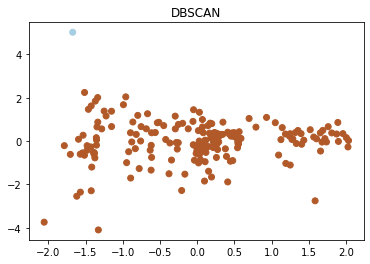

In [13]:
dbscan(EQT1, eps=1.7, min_samples=2)

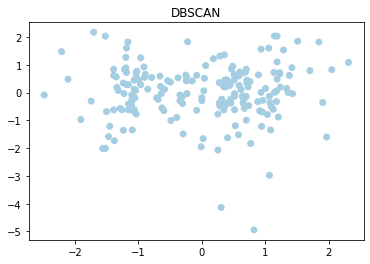

In [14]:
dbscan(EQT2, eps=1.7, min_samples=2)

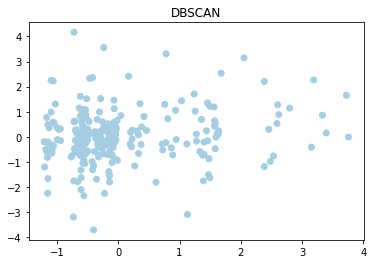

In [15]:
dbscan(EQT3, eps=1.7, min_samples=2)

# Non Guassian Copula

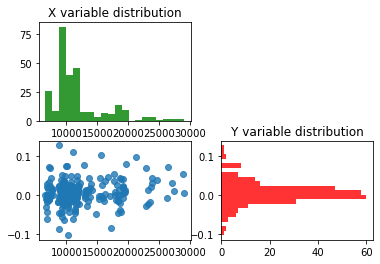

In [16]:
from copulalib.copulalib import Copula
from array import array 

# Data and histograms
def plotData():
    x = (bitcoin_data["Adj Close"]).fillna(0).values
    y = (bitcoin_data['Daily Return']).fillna(0).values
    fig = plt.figure()
    fig.add_subplot(2,2,1)
    plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
    plt.title('X variable distribution')
    fig.add_subplot(2,2,3)
    plt.scatter(x,y,marker="o",alpha=0.8)
    fig.add_subplot(2,2,4)
    plt.title('Joint X,Y')
    plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
    plt.title('Y variable distribution')    
    plt.show()
    
def generateCopulas():
    x = array((bitcoin_dataf["Adj Close"]).fillna(0).values.tolist())
    y = array((bitcoin_data['Daily Returns']).fillna(0).values.tolist())
    fig = plt.figure()
    
    clayton = Copula(x,y,family='clayton')
    uc,vc = clayton.generate_uv(1000)
    fig.add_subplot(2,2,2)
    plt.scatter(uc,vc,marker='.',color='red')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Clayton copula')
    plt.show()
    
#generateData()
plotData()
#generateCopulas() 

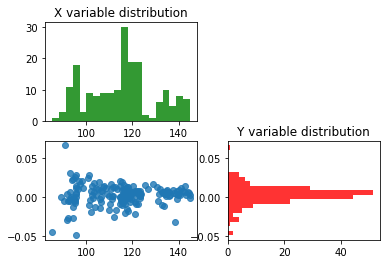

In [18]:
def plotData():
    x = (equity_data["Adj Close"]).fillna(0).values
    y = (equity_data['Daily Return']).fillna(0).values
    fig = plt.figure()
    fig.add_subplot(2,2,1)
    plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
    plt.title('X variable distribution')
    fig.add_subplot(2,2,3)
    plt.scatter(x,y,marker="o",alpha=0.8)
    fig.add_subplot(2,2,4)
    plt.title('Joint X,Y')
    plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
    plt.title('Y variable distribution')    
    plt.show()
    
def generateCopulas():
    x = array((equity_data["Adj Close"]).fillna(0).values.tolist())
    y = array((equity_data['Daily Return']).fillna(0).values.tolist())
    fig = plt.figure()
    
    clayton = Copula(x,y,family='clayton')
    uc,vc = clayton.generate_uv(1000)
    fig.add_subplot(2,2,2)
    plt.scatter(uc,vc,marker='.',color='red')
    plt.ylim(0,1)
    plt.xlim(0,1)
    plt.title('Clayton copula')
    plt.show()
    
#generateData()
plotData()
#generateCopulas() 